In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Predict Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Source = https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [3]:
from sklearn.model_selection import train_test_split

X = np.array(df.loc[:,'Pregnancies':'Age'])
y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=406)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [4]:
C_range = np.logspace(0, 10, 11)
gamma_range = np.logspace(-8, 2, 11)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_list = []

# RBF Kernel
for C in C_range:
    for gamma in gamma_range:
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_fit = svm_rbf.fit(X_train, y_train)
        svm_list.append(svm_fit)

        print('C = ' + str(C) + ' , ' + 'gamma = ' + str(gamma))


C = 1.0 , gamma = 1e-08
C = 1.0 , gamma = 1e-07
C = 1.0 , gamma = 1e-06
C = 1.0 , gamma = 1e-05
C = 1.0 , gamma = 0.0001
C = 1.0 , gamma = 0.001
C = 1.0 , gamma = 0.01
C = 1.0 , gamma = 0.1
C = 1.0 , gamma = 1.0
C = 1.0 , gamma = 10.0
C = 1.0 , gamma = 100.0
C = 10.0 , gamma = 1e-08
C = 10.0 , gamma = 1e-07
C = 10.0 , gamma = 1e-06
C = 10.0 , gamma = 1e-05
C = 10.0 , gamma = 0.0001
C = 10.0 , gamma = 0.001
C = 10.0 , gamma = 0.01
C = 10.0 , gamma = 0.1
C = 10.0 , gamma = 1.0
C = 10.0 , gamma = 10.0
C = 10.0 , gamma = 100.0
C = 100.0 , gamma = 1e-08
C = 100.0 , gamma = 1e-07
C = 100.0 , gamma = 1e-06
C = 100.0 , gamma = 1e-05
C = 100.0 , gamma = 0.0001
C = 100.0 , gamma = 0.001
C = 100.0 , gamma = 0.01
C = 100.0 , gamma = 0.1
C = 100.0 , gamma = 1.0
C = 100.0 , gamma = 10.0
C = 100.0 , gamma = 100.0
C = 1000.0 , gamma = 1e-08
C = 1000.0 , gamma = 1e-07
C = 1000.0 , gamma = 1e-06
C = 1000.0 , gamma = 1e-05
C = 1000.0 , gamma = 0.0001
C = 1000.0 , gamma = 0.001
C = 1000.0 , gamma = 0.01
C

1__1.0._______________1__1e-8  
2__10________________2__1e-7  
3__100.______________3__1e-6  
4__1000._____________4__1e-5  
5__10000____________5__0.0001  
6__100000___________6__0.001  
7__1000000._________7__0.01  
8__10000000.________8__0.1  
9__100000000_______9__1.0  
10_1000000000_____10_10  
11_10000000000____11_100

In [ ]:
import pickle

# save train-test data
svm_save = open('svm_train.csv', 'wb')
pickle.dump(svm_fit, svm_save)
svm_save.close()


In [ ]:
# load data
svm_read = open('svm_train.csv', 'rb')
svm_list_load = pickle.load(svm_read)
svm_list_load


SVC(C=1000000000, gamma=0.0001)

In [ ]:
test_max = -1
idx = -1
test_list = []

for n in range(0, (len(C_range)*len(gamma_range))):
    test = svm_list_load[n].score(X_test, y_test)
    test_list.append(test)

    if test_max < test:
        idx = n
        test_max = test

print('idx = ' + str(idx))
print(svm_list_load[idx])
print('test_max = ' + str(test_max))

In [ ]:
svm = svm_list_load[idx]
svm

In [ ]:
test_grid = np.array(test_list).reshape(len(C_range), len(gamma_range))

In [ ]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


In [ ]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    test_grid,
    interpolation="nearest",
    cmap=plt.cm.seismic,
    norm=MidpointNormalize(vmin=0, midpoint=0.85),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()


In [8]:
train_ = svm.score(X_train, y_train)
test_ = svm.score(X_test, y_test)

y_pred_ = svm.predict(X_test)

y_score_ = svm.decision_function(X_test)

svm_var = [train_, test_, y_pred_, y_score_]

In [9]:
svm_save_var = open('svm_var.csv', 'wb')
pickle.dump(svm_var, svm_save_var)
svm_save_var.close()

In [10]:
svm_read_var = open('svm_var.csv', 'rb')
svm_result = pickle.load(svm_read_var)
svm_result

[0.8696615525183691,
 0.8685042067994061,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-7804.34965435, 13935.14006528, -2495.66555647, ...,
        -2314.25977186, 14223.75747015,  9660.09423795])]

In [11]:
# 0, 1, 2, 3
train = svm_result[0]
test = svm_result[1]
y_pred = svm_result[2]
y_score = svm_result[3]

(0.8696615525183691,
 0.8685042067994061,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-7804.34965435, 13935.14006528, -2495.66555647, ...,
        -2314.25977186, 14223.75747015,  9660.09423795]))

In [12]:
print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))
print("y_pred = " + str(y_pred))
print("y_score = " + str(y_score))

Train set accuracy = 0.8696615525183691
Test set accuracy = 0.8685042067994061


In [13]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(53313, 8490, 8780, 60752)

In [ ]:
plt.rcParams.update({'font.size': 14})

0 = not diabetic  
1 = diabetic  

negative = not diabetic  
positive = diabetic  

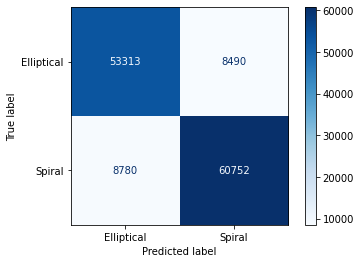

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# label_name = 'Elliptical', 'Spiral'

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues',
    # display_labels=label_name,
    ax=ax)

ax.set_xlabel('Predicted label', fontdict={'size': '16'})
ax.set_ylabel('True label', fontdict={'size': '16'})
ax.tick_params(axis='both', labelsize=14)

plt.show()


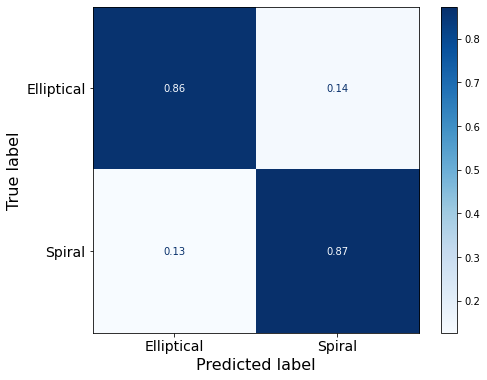

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', normalize='true',
    # display_labels=label_name,
    ax=ax)

ax.set_xlabel('Predicted label', fontdict={'size': '16'})
ax.set_ylabel('True label', fontdict={'size': '16'})
ax.tick_params(axis='both', labelsize=14)

plt.show()


1 = diabetic  
0 = not diabetic

In [16]:
X_test_tn = []
X_test_tp = []
X_test_fn = []
X_test_fp = []

for i in np.arange(0, len(y_test), 1):
    if y_test[i] == y_pred[i] == 0:
        # 0 = not diabetic = n
        X_test_tn += [X_test[i]]

    elif y_test[i] == y_pred[i] == 1:
        # 1 = diabetic = p
        X_test_tp += [X_test[i]]
        
    elif y_test[i] > y_pred[i]:
        # 1 > 0 = diabetic but pred not diabetic
        X_test_fn += [X_test[i]]
        
    elif y_test[i] < y_pred[i]:
        # 0 < 1 = not diabetic but pred diabetic
        X_test_fp += [X_test[i]]


In [17]:
# X = [(a1, b1, c1, d1, e1), (a2, b2, c2, d2, e2), (a3, b3, c3, d3, e3),...]
# *X = (a1, b1, c1, d1, e1) (a2, b2, c2, d2, e2) (a3, b3, c3, d3, e3)...
# zip(*X) = (a1, a2, a3,...), (b1, b2, b3,...), (c1, c2, c3,...), (d1, d2, d3,...), (e1, e2, e3,...) --> อ่านไม่ได้เลยต้องใส่ list

X_test_tn = list(zip(*X_test_tn))
X_test_tp = list(zip(*X_test_tp))
X_test_fn = list(zip(*X_test_fn))
X_test_fp = list(zip(*X_test_fp))

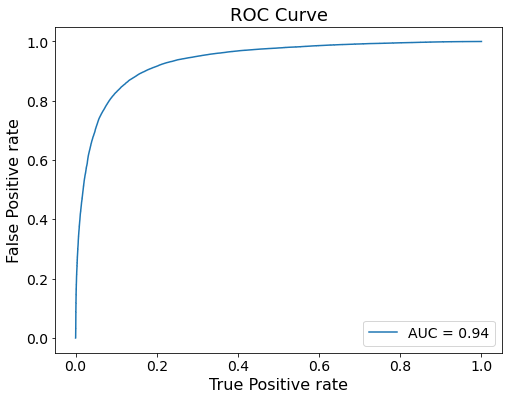

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fig, ax = plt.subplots(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.xlabel('True Positive rate', fontdict={'size':'16'})
plt.ylabel('False Positive rate', fontdict={'size':'16'})
plt.tick_params(axis='both', labelsize=14)
plt.title('ROC Curve', size=18)

plt.show()

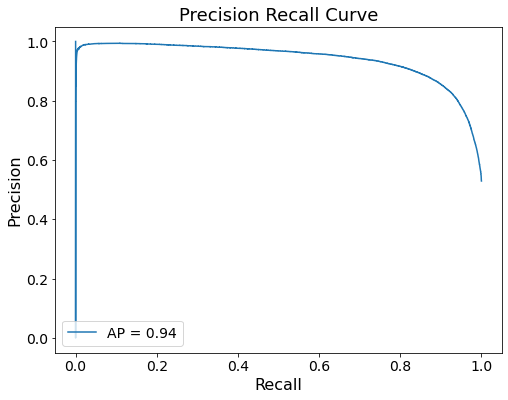

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

fig, ax = plt.subplots(figsize=(8, 6))

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm.classes_[1])
ap = average_precision_score(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=ap).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Recall', fontdict={'size':'16'})
plt.ylabel('Precision', fontdict={'size':'16'})
plt.title('Precision Recall Curve', size=18)

plt.show()

In [20]:
from sklearn.inspection import permutation_importance

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features = np.array(feature_names)


In [21]:
perm_importance = permutation_importance(svm, X_test, y_test)

In [22]:
save_imp = open('svm_perm_imp.csv', 'wb')
pickle.dump(perm_importance, save_imp)
save_imp.close()

In [23]:
read_imp = open('svm_perm_imp.csv', 'rb')
perm_imp = pickle.load(read_imp)

Text(0.5, 0, 'Importance Score')

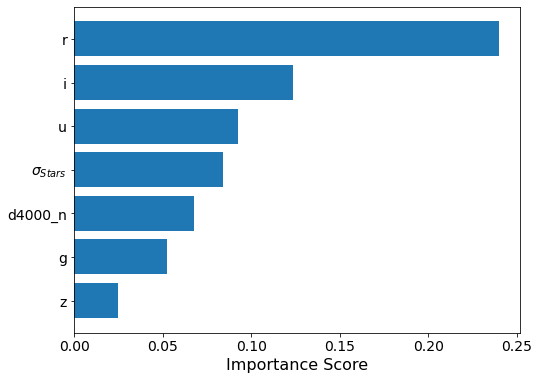

In [24]:
sorted_idx = perm_imp.importances_mean.argsort()

plt.figure(figsize=(8, 6), facecolor='none')

plt.barh(features[sorted_idx], perm_imp.importances_mean[sorted_idx])

plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Importance Score', size=16)


In [ ]:
def hist_target(xlim, xticks, step, x, x1, x2, x_name):
    plt.figure(figsize=(8, 6))
    # plt.gca(xlim=xlim, xticks=xticks)

    bins = np.arange(np.min(X_test), np.max(X_test) + step, step)
    
    plt.hist(x1, bins=bins, alpha=0.5, label='diabetic')
    plt.hist(x2, bins=bins, alpha=0.5, label='not diabetic')

    plt.xlabel(x_name, size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

In [ ]:
hist_target(xlim, xticks, step, x, x1, x2, x_name)

In [25]:
def tn_tp_fn_fp(xlim, xticks, step, xlabel, pos):
    plt.figure(figsize=(8, 6), facecolor='none')
    # plt.gca(xlim=xlim, xticks = xticks)

    # step = 0.15
    bins = np.arange(np.min(X_test), np.max(X_test) + step, step)

    plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
    plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
    plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
    plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

    plt.xlabel(str(xlabel), size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

In [ ]:
tn_tp_fn_fp(xlim, xticks, step, xlabel, pos)

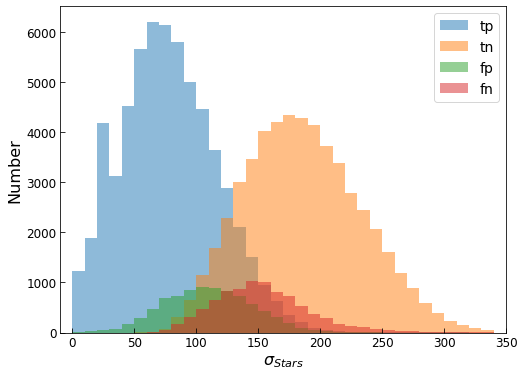

In [ ]:
xlim = [-10, 350]
xticks = np.arange(0, 360, 50)
xlabel = '$\sigma_{Stars}$'
pos = 1

plt.figure(figsize=(8, 6), facecolor='none')
plt.gca(xlim=xlim, xticks = xticks)

# step = 0.05
# bins = np.arange(np.min(X_test), np.max(X_test) + step, step)
bins = np.arange(0, 350, 10)

plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

plt.xlabel(str(xlabel), size=16)
plt.ylabel('Number', size=16)
plt.legend(loc='upper right')

plt.tick_params(which='major', direction='in', length=5, labelsize='12')

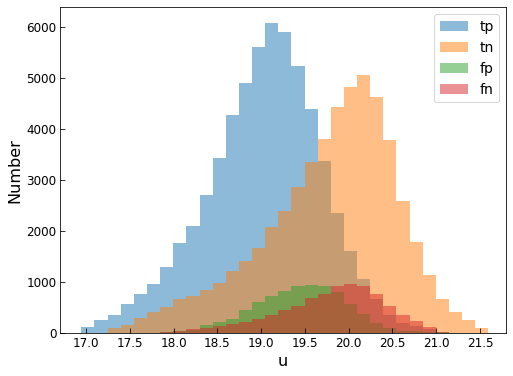

In [ ]:
tn_tp_fn_fp([16.7, 21.8], np.arange(17, 22, 0.5), 'u', 2)

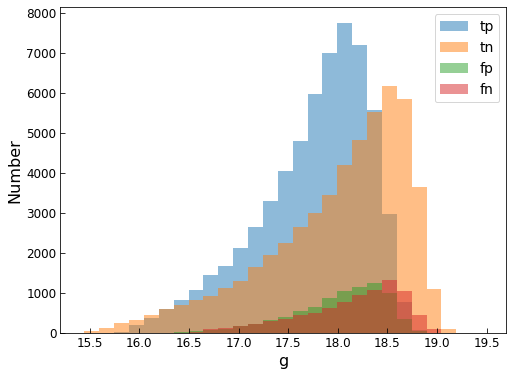

In [ ]:
tn_tp_fn_fp([15.2, 19.7], np.arange(15.5, 20, 0.5), 'g', 3)

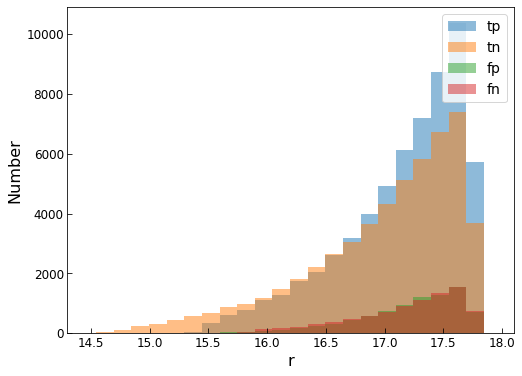

In [ ]:
tn_tp_fn_fp([14.3, 18.1], np.arange(14.5, 18.5, 0.5), 'r', 4)

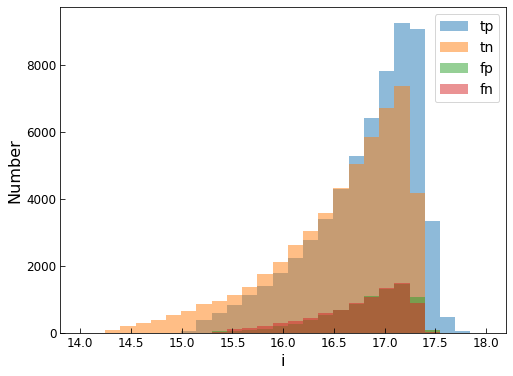

In [ ]:
tn_tp_fn_fp([13.8, 18.2], np.arange(14, 18.5, 0.5), 'i', 5)

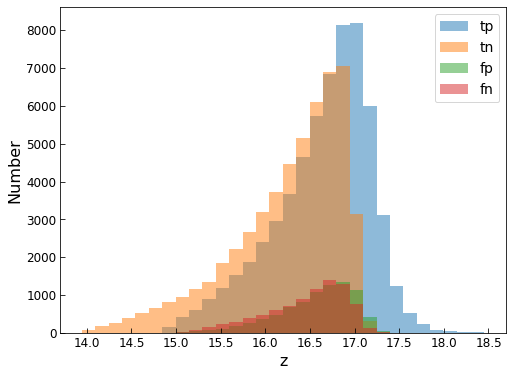

In [ ]:
tn_tp_fn_fp([13.7, 18.7], np.arange(14, 19, 0.5), 'z', 6)